In [7]:
!pip install Pillow

     ---------------------------------------- 3.3/3.3 MB 13.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
!pip install opencv-python


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
!pip install pytesseract


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Results found in file a-0


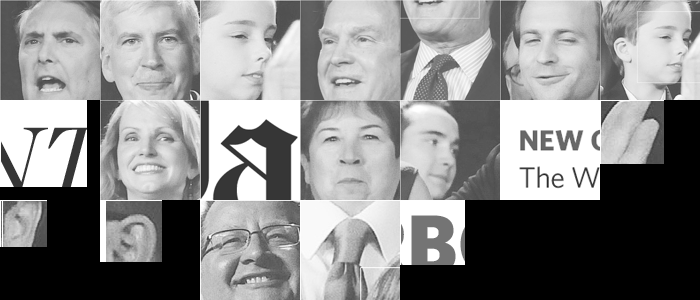

Results found in file a-1


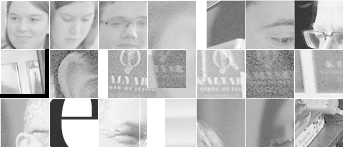

In [194]:
from zipfile import ZipFile
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 
import numpy as np
import os


# loading the face detection classifier
face = cv2.CascadeClassifier("C:\\Users\\lavinia\\Desktop\\PY3\\haarcascade_frontalface_default.xml")
eye = cv2.CascadeClassifier("C:\\Users\\lavinia\\Desktop\\PY3\\eye.xml")

directory = "C:\\Users\\lavinia\\Desktop\\PY3\\small"

def get_image_paths(directory):
    image_paths = []
    if os.path.isdir(directory):
        images = os.listdir(directory)
        image_paths = [os.path.join(directory,img) for img in images]
    return image_paths 



def cs(cropped_list):
    contact_sheet=Image.new(cropped_list[0].mode, (cropped_list[0].width *7, 3*cropped_list[0].height))        
    x=0
    y=0
    for img in cropped_list:
        contact_sheet.paste(img, (x, y) )
        if x+cropped_list[0].width == contact_sheet.width:
            x=0
            y=y+cropped_list[0].height
        else:
            x=x+cropped_list[0].width
    display(contact_sheet)  
    
images_paths_list = get_image_paths(directory)        
imgzip = ZipFile("C:\\Users\\lavinia\\Desktop\\PY3\\small_img.zip")
images_list = imgzip.infolist()

j = 0
MAX_SIZE = (100, 100)
for i in images_list:
    image_file = imgzip.open(i)
    img = Image.open(image_file)
    text = pytesseract.image_to_string(img)
    if 'Christopher' in text:
        detected_faces_img = cv2.imread(os.path.abspath(images_paths_list[j]))
        gray = cv2.cvtColor(detected_faces_img, cv2.COLOR_BGR2GRAY)
        faces = face.detectMultiScale(gray)
        faces_lst = faces.tolist()
        pil_img=Image.fromarray(gray,mode="L")
        drawing=ImageDraw.Draw(pil_img)
        cropped_list = []
        for rec in faces_lst:
            drawing.rectangle((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]), outline="white")
            cropped_image = pil_img.crop((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]))
            cropped_image.thumbnail(MAX_SIZE)
            cropped_list.append(cropped_image)
        print("Results found in file a-" + str(j))
        cs(cropped_list)
        j += 1